In [1]:
import tensorflow as tf

In [2]:
from tensorflow.keras.datasets import imdb
max_features = 10000
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)

In [3]:
from tensorflow.keras.preprocessing import sequence
max_len = 100
x_train = sequence.pad_sequences(x_train, maxlen=max_len)
x_test = sequence.pad_sequences(x_test, maxlen=max_len)

In [4]:
x_train.shape

(25000, 100)

In [5]:
y_test.shape

(25000,)

In [6]:
y_train.shape

(25000,)

In [7]:
y_test[:10]

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1], dtype=int64)

In [8]:
from tensorflow.keras.utils import to_categorical
y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)

In [9]:
y_test_one_hot.shape

(25000, 2)

In [10]:
y_test_one_hot[0]

array([1., 0.], dtype=float32)

In [11]:
from tensorflow.keras.layers import Input, Embedding, LSTM, SimpleRNN, Dense, Lambda
from tensorflow.keras.models import Model

In [12]:
# https://faroit.com/keras-docs/2.0.2/getting-started/functional-api-guide/
# Headline input: meant to receive sequences of "max_len" integers, between 0 and 10000.
main_input = Input(shape=(max_len,), dtype='int32')

# This embedding layer will encode the input sequence
# into a sequence of dense 64-dimensional vectors.
x = Embedding(output_dim=64, input_dim=max_features, input_length=max_len)(main_input)

# A SimpleRNN will transform the vector sequence into a single vector,
# containing information about the entire sequence
RNN_out = SimpleRNN(32, return_sequences=True)(x)
# this will return 100x32 for a document 

# 평균을 구함 => 하나의 문서에 대해서 32 차원 벡터 출력
out = Lambda(lambda x: tf.math.reduce_mean(x, axis=1))(RNN_out)


In [13]:
out.shape

TensorShape([None, 32])

In [14]:
x = Dense(16, activation='relu')(out)
main_output = Dense(2, activation='softmax')(x)
model = Model(inputs=main_input,outputs=main_output)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 100)]             0         
                                                                 
 embedding (Embedding)       (None, 100, 64)           640000    
                                                                 
 simple_rnn (SimpleRNN)      (None, 100, 32)           3104      
                                                                 
 lambda (Lambda)             (None, 32)                0         
                                                                 
 dense (Dense)               (None, 16)                528       
                                                                 
 dense_1 (Dense)             (None, 2)                 34        
                                                                 
Total params: 643,666
Trainable params: 643,666
Non-trainable

In [15]:
from tensorflow.keras.optimizers import RMSprop
model.compile(optimizer=RMSprop(learning_rate=0.001), loss='binary_crossentropy', metrics=['acc'])

In [16]:
history = model.fit(x_train, y_train_one_hot, epochs=10, batch_size=128, validation_split=0.2)

Epoch 1/10
157/157 [==============================] - 6s 31ms/step - loss: 0.5251 - acc: 0.7483 - val_loss: 0.4280 - val_acc: 0.8040
Epoch 2/10
157/157 [==============================] - 5s 31ms/step - loss: 0.3335 - acc: 0.8622 - val_loss: 0.3779 - val_acc: 0.8332
Epoch 3/10
157/157 [==============================] - 5s 30ms/step - loss: 0.2702 - acc: 0.8942 - val_loss: 0.4058 - val_acc: 0.8346
Epoch 4/10
157/157 [==============================] - 5s 29ms/step - loss: 0.2361 - acc: 0.9088 - val_loss: 0.3821 - val_acc: 0.8336
Epoch 5/10
157/157 [==============================] - 5s 30ms/step - loss: 0.2091 - acc: 0.9207 - val_loss: 0.4396 - val_acc: 0.8222
Epoch 6/10
157/157 [==============================] - 5s 32ms/step - loss: 0.1851 - acc: 0.9327 - val_loss: 0.4594 - val_acc: 0.8288
Epoch 7/10
157/157 [==============================] - 5s 30ms/step - loss: 0.1647 - acc: 0.9408 - val_loss: 0.4827 - val_acc: 0.8156
Epoch 8/10
157/157 [==============================] - 4s 28ms/step - 

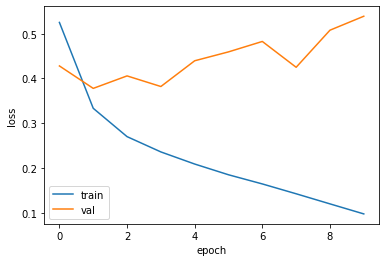

In [17]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

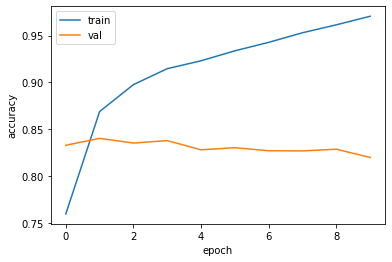

In [11]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train','val'])
plt.show()

In [18]:
test_loss, test_acc = model.evaluate(x_test,y_test_one_hot)

782/782 [==============================] - 4s 5ms/step - loss: 0.5652 - acc: 0.8179


In [19]:
print('test_acc:', test_acc)

test_acc: 0.8178799748420715
